<a href="https://colab.research.google.com/github/kaytlyn724/MAT422/blob/main/HW3.4_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **3.4 Logistic Regression**

---

### **Key Concepts:**

*   3.4 Logistic Regression

In [8]:
### important imports to run code ###

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

## **3.4 Logistic Regression**

**Logistic Regression:** A model that in its basic form uses a logistic function to model a binary dependent variable. It can be extended to several classes of events such as classification of images. It is used when the dependent vairable can only take two possible outcomes like 0 and 1. Predicts the probability of an event occurring.

Logisitic Regressions uses the sigmoid function to map the predicted values to probabilities.

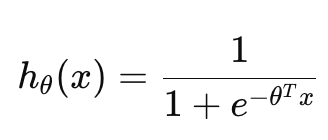

Where:

- $h_θ(x)$ is the predicted probability that the output is 1
- $θ$ are the weights of the model
- $x$ are the inputs
- $e$ is the base of the natural log

In classification (binary) the decisions rule for logistic regression is

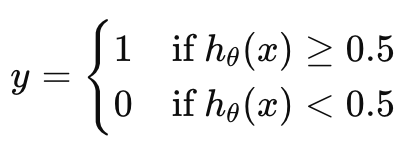

Accuracy: 1.00


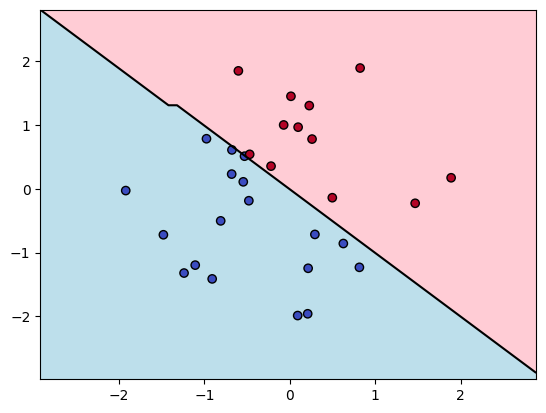

In [9]:
# Generate synthetic data
# 100 samples with 2 features
np.random.seed(42)
X = np.random.randn(100, 2)
# Binary labels based on a simple rule
y = (X[:, 0] + X[:, 1] > 0).astype(int)

# Split data into training and test sets for later
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Determine the accuracy of the predictions
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Visualize the decision boundary on a plot
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Colors on either side of the black decision boundary
    plt.contourf(xx, yy, Z, levels=[-1, 0, 1], alpha=0.8, colors=['lightblue', 'pink'])
    plt.contour(xx, yy, Z, levels=[0], colors='black')

    # Scatter plot with data points
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.coolwarm)
    plt.show()

# Plot the boundary determining which dots fall where
plot_decision_boundary(X_test, y_test, model)